In [ ]:
import os
import json
import matplotlib.pyplot as plt

import xarray as xr
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from pypalettes import load_cmap
cmap = load_cmap("highcontrast")

In [3]:
def plot_efp_boxplots(models_dir, hemisphere='nh', title_prefix='PAMIP'):
    """
    Plot seasonal EFP values as boxplots for all models in a directory,
    showing DJF for NH and JAS for SH.

    Parameters
    ----------
    models_dir : str
        Directory containing one subdirectory per model, each with its JSON.
    hemisphere : str
        'nh' or 'sh'
    title_prefix : str
        Text to prefix the figure title.
    """

    # Pick the season based on hemisphere
    if hemisphere == 'nh':
        seasons_order = ["DJF"]
        files_to_plot = ['efp_nh', 'efp_nh_123', 'efp_nh_gt3']
        hemi_label = 'Northern Hemisphere (DJF)'
    else:
        seasons_order = ["JAS"]
        files_to_plot = ['efp_sh', 'efp_sh_123', 'efp_sh_gt3']
        hemi_label = 'Southern Hemisphere (JAS)'

    # Collect EFP values across all models
    efp_values = {key: {season: [] for season in seasons_order} for key in files_to_plot}

    model_dirs = sorted([d for d in os.listdir(models_dir) if os.path.isdir(os.path.join(models_dir, d))])

    for model in model_dirs:
        json_path = os.path.join(models_dir, model, "efp_results.json")
        if not os.path.exists(json_path):
            print(f"⚠️ JSON not found for {model}, skipping.")
            continue

        with open(json_path, 'r') as f:
            data = json.load(f)

        for efp_key in files_to_plot:
            efp_data = data.get(efp_key)
            if efp_data is None:
                continue

            for season, info in efp_data.items():
                if season not in seasons_order:
                    continue
                efp_values[efp_key][season].append(info['efp'])

    # Plot boxplots (only one season, so one subplot)
    fig, ax = plt.subplots(figsize=(8, 6))

    season = seasons_order[0]
    data_for_season = [efp_values[key][season] for key in files_to_plot]

    bp = ax.boxplot(
        data_for_season,
        tick_labels=files_to_plot,   # was "labels"
        patch_artist=True
    )

    # Color each box
    colors = [cmap(i) for i in range(len(files_to_plot))]
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_title(f"{title_prefix} EFP: {hemi_label}", fontsize=16)
    ax.set_ylabel("EFP")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


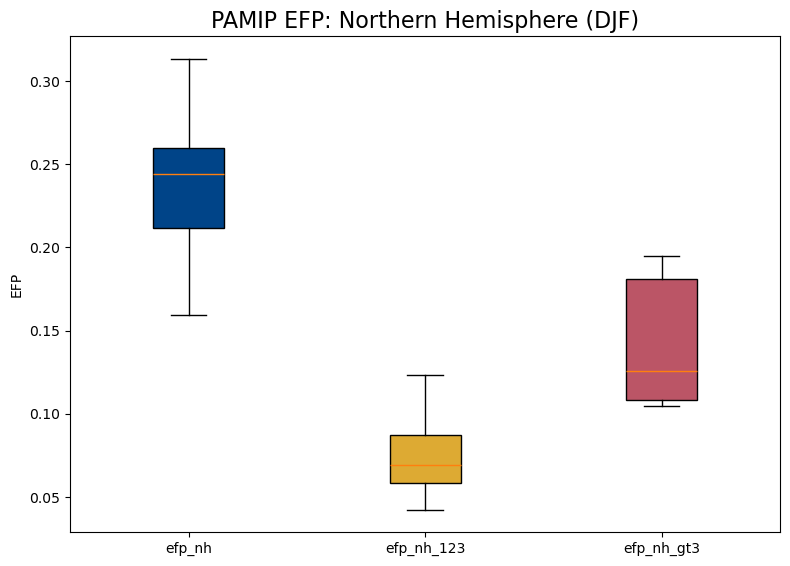

In [4]:
plot_efp_boxplots('/home/links/ct715/eddy_feedback/chapter1/annual_cycle/data/PAMIP')

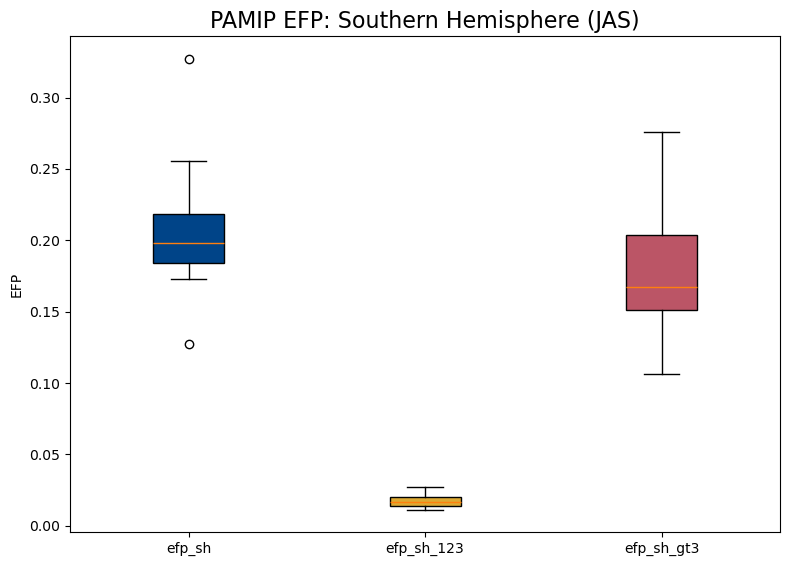

In [5]:
plot_efp_boxplots('/home/links/ct715/eddy_feedback/chapter1/annual_cycle/data/PAMIP', hemisphere='sh')

In [7]:
nh_path = '/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots/data/efp_nh.csv'

nh = pd.read_csv(nh_path)
nh

,model,efp_nh,efp_nh_gt3,efp_nh_123
0,IPSL-CM6A-LR,0.2623,0.1947,0.0654
1,CNRM-CM6-1,0.2244,0.1286,0.0827
2,FGOALS-f3-L,0.2353,0.1231,0.0731
3,HadGEM3-GC31-LL,0.1735,0.1072,0.0529
4,AWI-CM-1-1-MR,0.2592,0.1931,0.0607
5,CanESM5,0.3133,0.1771,0.1232
6,HadGEM3-GC31-MM,0.2525,0.1087,0.1022
7,MIROC6,0.1592,0.1045,0.0425


In [8]:
sh_path = '/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots/data/efp_sh.csv'

sh = pd.read_csv(sh_path)
sh

,model,efp_sh,efp_sh_gt3,efp_sh_123
0,IPSL-CM6A-LR,0.2015,0.1938,0.0179
1,CNRM-CM6-1,0.1944,0.1805,0.0132
2,FGOALS-f3-L,0.1273,0.1061,0.0114
3,HadGEM3-GC31-LL,0.1729,0.1528,0.0160
4,AWI-CM-1-1-MR,0.2557,0.2325,0.0223
5,CanESM5,0.3271,0.2758,0.0195
6,HadGEM3-GC31-MM,0.1874,0.1544,0.0140
7,MIROC6,0.2058,0.1458,0.0273


In [9]:
# Concatenate them
df = nh.merge(sh, how='outer')
df


,model,efp_nh,efp_nh_gt3,efp_nh_123,efp_sh,efp_sh_gt3,efp_sh_123
0,AWI-CM-1-1-MR,0.2592,0.1931,0.0607,0.2557,0.2325,0.0223
1,CNRM-CM6-1,0.2244,0.1286,0.0827,0.1944,0.1805,0.0132
2,CanESM5,0.3133,0.1771,0.1232,0.3271,0.2758,0.0195
3,FGOALS-f3-L,0.2353,0.1231,0.0731,0.1273,0.1061,0.0114
4,HadGEM3-GC31-LL,0.1735,0.1072,0.0529,0.1729,0.1528,0.0160
5,HadGEM3-GC31-MM,0.2525,0.1087,0.1022,0.1874,0.1544,0.0140
6,IPSL-CM6A-LR,0.2623,0.1947,0.0654,0.2015,0.1938,0.0179
7,MIROC6,0.1592,0.1045,0.0425,0.2058,0.1458,0.0273


/home/links/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/home/links/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


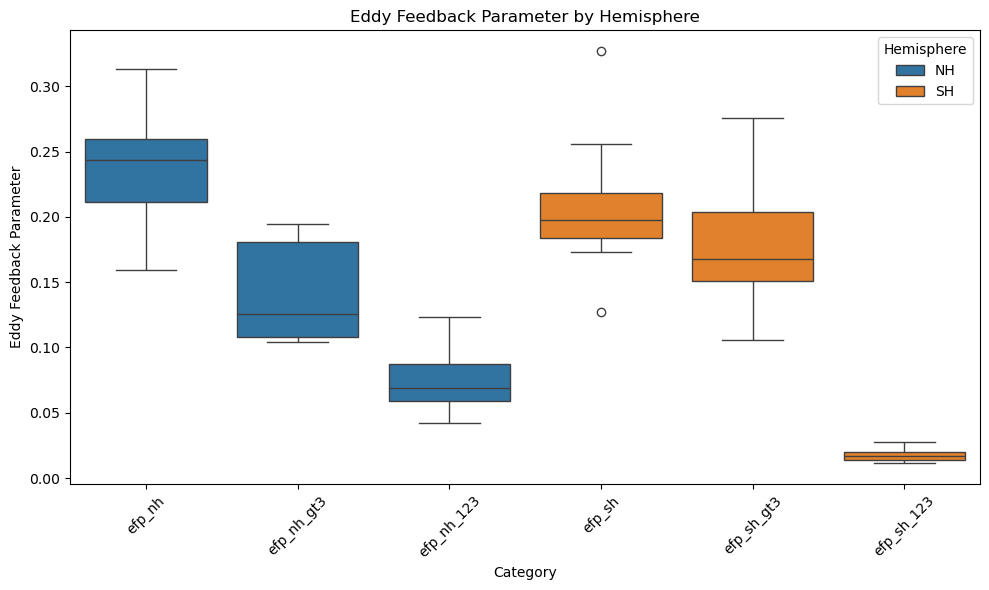

In [10]:
# Reshape to long format
df_long = df.melt(id_vars="model", 
                  value_vars=["efp_nh", "efp_nh_gt3", "efp_nh_123", 
                              "efp_sh", "efp_sh_gt3", "efp_sh_123"],
                  var_name="category", value_name="efp")

# Add hemisphere column
df_long["hemisphere"] = df_long["category"].apply(lambda x: "NH" if "nh" in x else "SH")

# Plot with seaborn
plt.figure(figsize=(10,6))
sns.boxplot(data=df_long, x="category", y="efp", hue="hemisphere")
plt.title("Eddy Feedback Parameter by Hemisphere")
plt.ylabel("Eddy Feedback Parameter")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.legend(title="Hemisphere")
plt.tight_layout()
plt.show()

/home/links/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/home/links/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/home/links/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


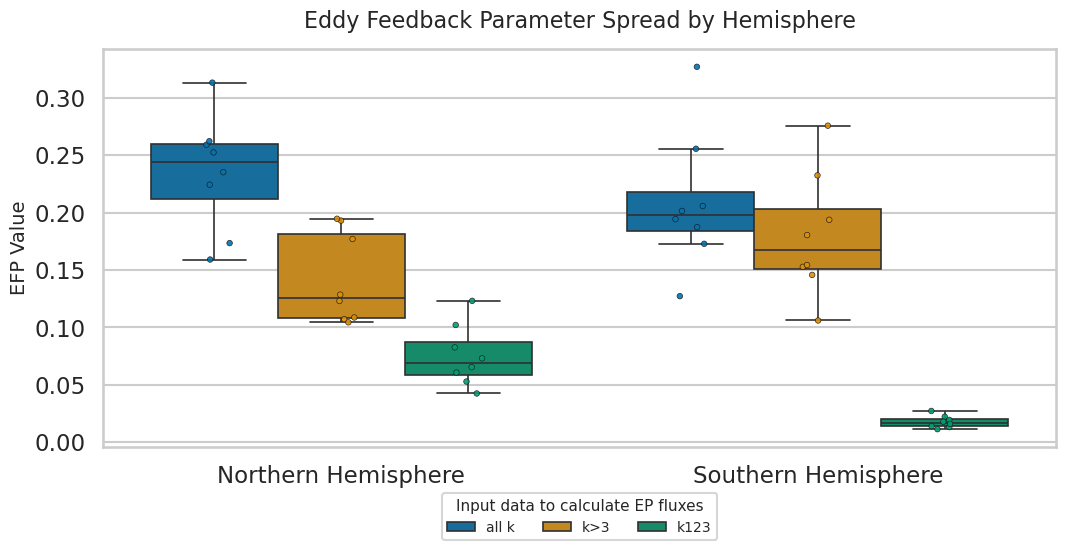

In [11]:
# Melt to long format for seaborn
df_long = df.melt(
    id_vars="model",
    value_vars=["efp_nh", "efp_nh_gt3", "efp_nh_123", "efp_sh", "efp_sh_gt3", "efp_sh_123"],
    var_name="hemisphere_dataset", value_name="efp"
)

# Split hemisphere and dataset info
df_long[['hemisphere', 'dataset']] = df_long['hemisphere_dataset'].str.extract(r'efp_(nh|sh)(_.*)?')
df_long['dataset'] = df_long['dataset'].replace({None: 'all k', '_gt3': 'k>3', '_123': 'k123'})

# Set style and context
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

plt.figure(figsize=(11,6))

# Boxplot
sns.boxplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    linewidth=1.2, showfliers=False
)

# Overlay stripplot
sns.stripplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    dodge=True, alpha=0.9, size=4, jitter=True,
    marker="o", linewidth=0.5, edgecolor='k'
)

# Labels and title
plt.xlabel("")
plt.ylabel("EFP Value", fontsize=14)
plt.title("Eddy Feedback Parameter Spread by Hemisphere", fontsize=16, pad=15)
plt.xticks([0, 1], ["Northern Hemisphere", "Southern Hemisphere"])

# Remove duplicate legend handles
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3],
           title="Input data to calculate EP fluxes", loc="lower center",
           bbox_to_anchor=(0.5, -0.25),
           ncol=3, fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from pypalettes import load_cmap

# Load custom colormap
cmap = load_cmap("highcontrast")
palette = cmap.colors


/home/links/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/home/links/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/home/links/ct715/miniforge3/envs/eddy/lib/python3.10/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


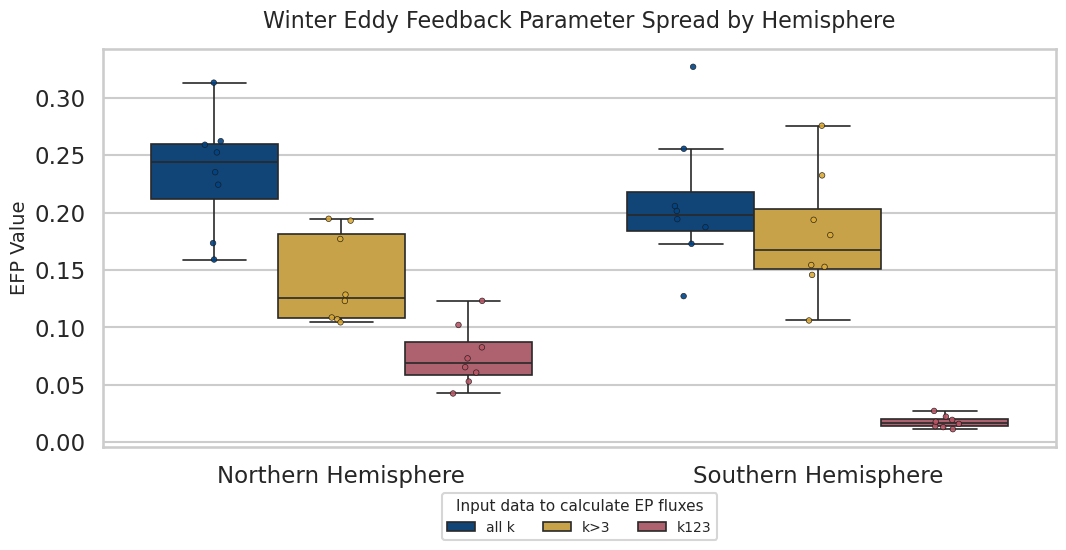

In [17]:

# Convert to discrete palette for seaborn
# palette = sns.color_palette(cmap, n_colors=3)

# Melt to long format for seaborn
df_long = df.melt(
    id_vars="model",
    value_vars=["efp_nh", "efp_nh_gt3", "efp_nh_123", "efp_sh", "efp_sh_gt3", "efp_sh_123"],
    var_name="hemisphere_dataset", value_name="efp"
)

# Split hemisphere and dataset info
df_long[['hemisphere', 'dataset']] = df_long['hemisphere_dataset'].str.extract(r'efp_(nh|sh)(_.*)?')
df_long['dataset'] = df_long['dataset'].replace({None: 'all k', '_gt3': 'k>3', '_123': 'k123'})

# Set general style and context (no palette override)
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(11, 6))

# Boxplot
sns.boxplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    linewidth=1.2, showfliers=False,
    palette=palette
)

# Overlay stripplot
sns.stripplot(
    data=df_long,
    x='hemisphere', y='efp', hue='dataset',
    dodge=True, alpha=0.9, size=4, jitter=True,
    marker="o", linewidth=0.5, edgecolor='k',
    palette=palette
)

# Labels and title
plt.xlabel("")
plt.ylabel("EFP Value", fontsize=14)
plt.title("Winter Eddy Feedback Parameter Spread by Hemisphere", fontsize=16, pad=15)
plt.xticks([0, 1], ["Northern Hemisphere", "Southern Hemisphere"])

# Remove duplicate legend handles
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3],
           title="Input data to calculate EP fluxes", loc="lower center",
           bbox_to_anchor=(0.5, -0.25),
           ncol=3, fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()
